# Diabetes Prediction Model

## Data Analys

### Making Imports

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [8]:
df = pd.read_csv('Data/diabetes.csv')

In [10]:
df.shape

(768, 9)

In [18]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<Axes: >

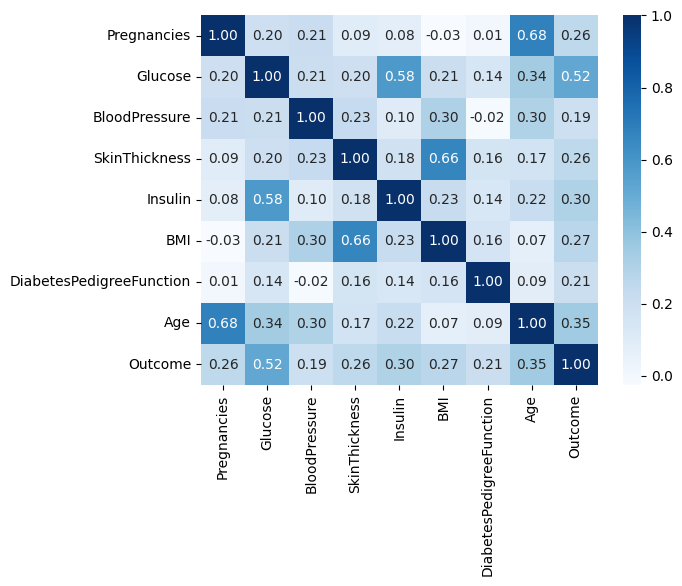

In [49]:
# True correlation without 0 values Before Filling
columns_to_check = ['BMI', 'Glucose','SkinThickness', 'BloodPressure', 'Insulin','DiabetesPedigreeFunction', 'Age']
filtered_df = df[(df[columns_to_check] != 0).all(axis=1)]
sns.heatmap(filtered_df.corr(),cmap='Blues', annot=True, fmt='.2f')

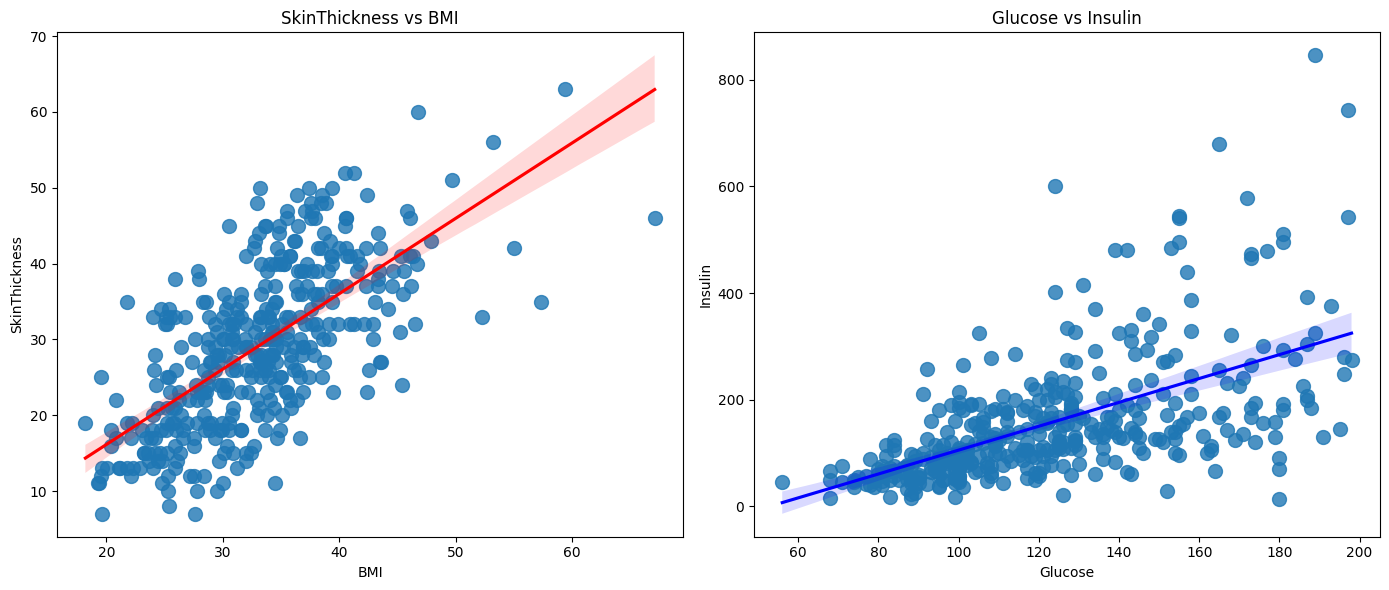

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.regplot(x='BMI', y='SkinThickness', data=filtered_df, ax=axes[0], scatter_kws={'s':100}, line_kws={'color':'red'})
axes[0].set_title('SkinThickness vs BMI')

sns.regplot(x='Glucose', y='Insulin', data=filtered_df, ax=axes[1], scatter_kws={'s':100}, line_kws={'color':'blue'})
axes[1].set_title('Glucose vs Insulin')
plt.tight_layout()
plt.show()